#### Importing libraries for reading and displaying images

In [1]:
#for reading images
import cv2
#for displaying arrays in form of images
import matplotlib.pyplot as plt

#### Reading image

In [2]:
image = cv2.imread('sample.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = img.tolist()

#### Displaying Image Comparisons

In [3]:
def compare(original, manipulated):
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.title("Manipulated")
    plt.imshow(manipulated)
    plt.subplot(2, 1, 2)
    plt.title("Original")
    plt.imshow(original)
    plt.show()

<center> <h1>User defined Functions</h1></center>
Here, we will code some functions which will help in complex manipulations further

In [4]:
def print_shape(img):
    try:
        print("Shape of the array is:", len(img), "x", len(img[0]), "x",
              len(img[0][0]))
    except:
        print("Shape of the array is:", len(img), "x", len(img[0]))


def add_list(img1, img2):
    return [[img1[i][j] + img2[i][j] for j in range(len(img1[0]))]
            for i in range(len(img1))]


#original shape
print("Original:")
print_shape(img)
print("\n")


def channel_first(img):
    temp1 = []
    for i in range(len(img[0][0])):
        temp2 = []
        for j in range(len(img)):
            temp3 = []
            for k in range(len(img[0])):
                temp3.append(img[j][k][i])
            temp2.append(temp3)
        temp1.append(temp2)
    return temp1


print("After Channel_first operation")
z = channel_first(img)
print_shape(z)
print("\n")


def channel_last(img):
    temp1 = []
    for i in range(len(img[0])):
        temp2 = []
        for j in range(len(img[0][0])):
            temp3 = []
            for k in range(len(img)):
                temp3.append(img[k][i][j])
            temp2.append(temp3)
        temp1.append(temp2)
    return temp1


print("After Channel_last operation")
z = channel_last(z)
print_shape(z)

Original:
Shape of the array is: 533 x 800 x 3


After Channel_first operation
Shape of the array is: 3 x 533 x 800


After Channel_last operation
Shape of the array is: 533 x 800 x 3


<br>
<center><h1> Image Manipulation

#### Displaying channels

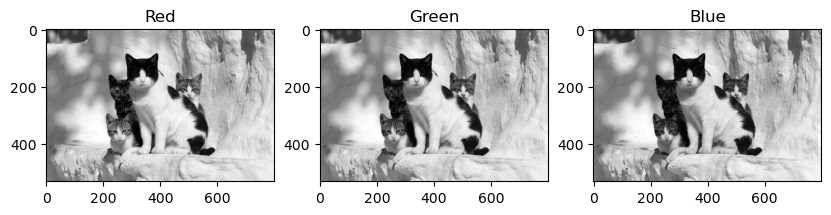

In [5]:
channel_wise = channel_first(img)
plt.figure(figsize=(10, 20))
plt.subplot(1, 3, 1)
plt.title("Red")
plt.imshow(channel_wise[0], cmap="gray")
plt.subplot(1, 3, 2)
plt.title("Green")
plt.imshow(channel_wise[1], cmap="gray")
plt.subplot(1, 3, 3)
plt.title("Blue")
plt.imshow(channel_wise[2], cmap="gray")
plt.show()

#### Channel-wise addition
Adding all channel(RGB) values to a single channel

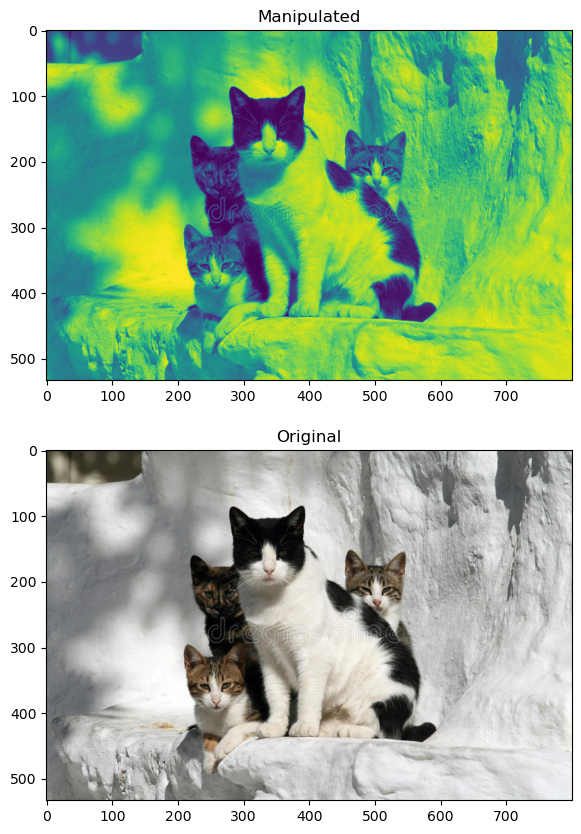

In [6]:
def channel_wise_addition(img):
    temp = channel_first(img)
    return add_list(temp[2], add_list(temp[0], temp[1]))

compare(img, channel_wise_addition(img))

#### Mirror Vertical

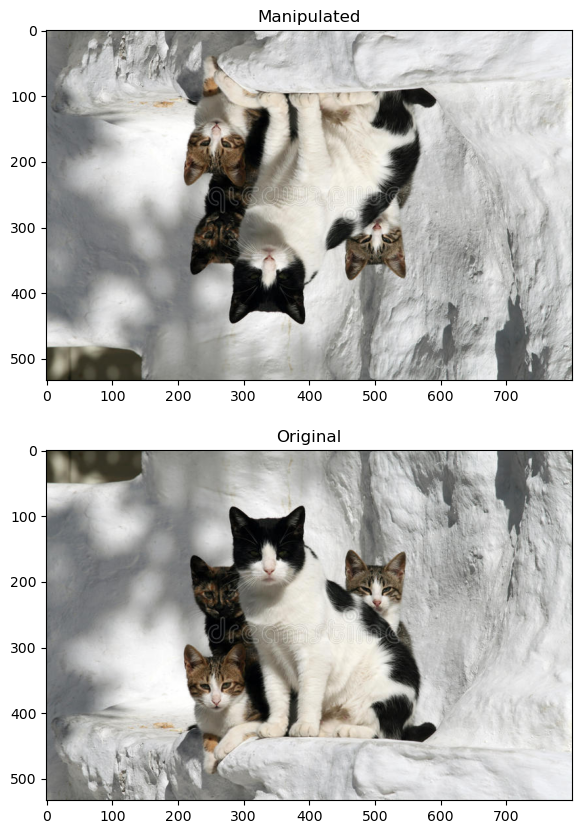

In [7]:
def mirror_v(img):
    return [img[-i - 1] for i in range(len(img))]


compare(img,mirror_v(img))

#### Mirror Horizontal

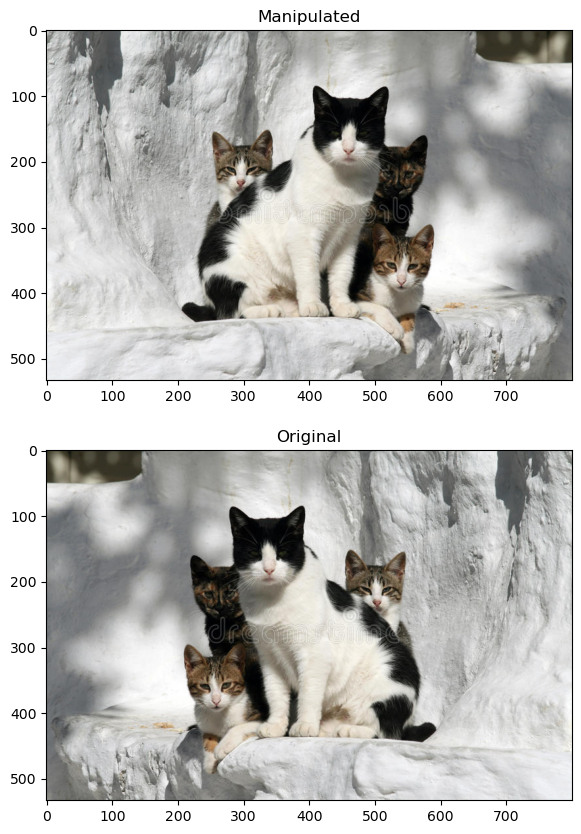

In [8]:
def mirror_h(img):
    return [[img[i][-j - 1] for j in range(len(img[0]))]
            for i in range(len(img))]


compare(img,mirror_h(img))

#### Blur

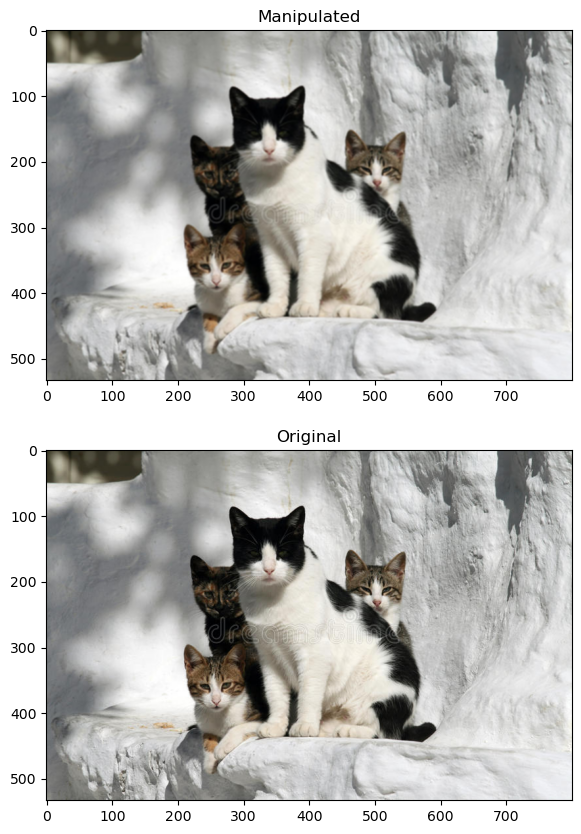

In [9]:
def blur(img):
    temp1=[]
    for i in range(len(img)):
        temp2=[]
        for j in range(len(img[0])):
            temp3=[]
            for k in range(len(img[0][0])):
                a_pixels = 1
                temp = img[i][j][k]
                try:
                    temp += img[i + 1][j + 1][k]
                    a_pixels += 1
                except:
                    True
                try:
                    temp += img[i + 1][j][k]
                    a_pixels += 1
                except:
                    True
                try:
                    temp += img[i + 1][j - 1][k]
                    a_pixels += 1
                except:
                    True
                try:
                    temp += img[i][j - 1][k]
                    a_pixels += 1
                except:
                    True

                try:
                    temp += img[i - 1][j - 1][k]
                    a_pixels += 1
                except:
                    True
                try:
                    temp += img[i - 1][j][k]
                    a_pixels += 1
                except:
                    True
                try:
                    temp += img[i - 1][j + 1][k]
                    a_pixels += 1
                except:
                    True
                try:
                    temp += img[i][j + 1][k]
                    a_pixels += 1
                except:
                    True

                temp3.append(int(temp / a_pixels))
            temp2.append(temp3)
        temp1.append(temp2)

    return temp1


compare(img, blur(img))